In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with sqlite3.connect("../laliga.sqlite") as con:
    df=pd.read_sql_query("SELECT * FROM Matches",con)
    dr=pd.read_sql_query("SELECT * FROM Predictions",con)

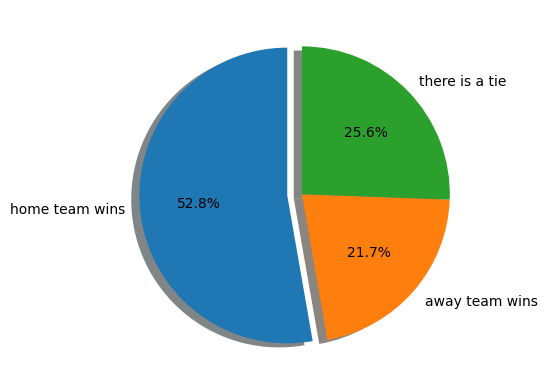

In [5]:
# Exercise 1

df = df.dropna(subset=['score'])

df["score_home_team"] = df["score"].str.split(":").str[0].astype(float)
df["score_away_team"] = df["score"].str.split(":").str[1].astype(float)

home_wins = (df['score_home_team'] > df['score_away_team']).sum()
away_wins = (df['score_home_team'] < df['score_away_team']).sum()
ties = (df['score_home_team'] == df['score_away_team']).sum()

sizes = [home_wins, away_wins, ties]
labels = ['home team wins', 'away team wins', 'there is a tie']
explode = (0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.show()

In [6]:
# Exercise 2

df_first_division = df[df['division'] != 2]

goals_scored = df_first_division.groupby('home_team')['score_home_team'].sum() + df_first_division.groupby('away_team')['score_away_team'].sum()
top_scorers = goals_scored.sort_values(ascending=False).head(10)

goals_conceded = df_first_division.groupby('home_team')['score_away_team'].sum() + df_first_division.groupby('away_team')['score_home_team'].sum()
top_conceders = goals_conceded.sort_values(ascending=False).head(10)

df_first_division['score_difference'] = np.abs(df_first_division["score_home_team"] - df_first_division["score_away_team"])
df_first_division['game_name'] = df_first_division["home_team"] + ' vs ' + df_first_division["away_team"]
differences= df_first_division.columns['score_difference','game_name']

top_differences = differences.columns.sort_values(by='score_difference',ascending=False).head(10)

#df_first_division["score_difference"] = np.abs(df_first_division["score_home_team"] - df_first_division["score_away_team"])


C:\Users\usuario\AppData\Local\Temp\ipykernel_16624\1291363820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_division.loc["score_difference"] = np.abs(df_first_division["score_home_team"] - df_first_division["score_away_team"]).copy()


,season,division,matchday,date,time,home_team,away_team,score,score_home_team,score_away_team
0,1928-1929,1.0,1.0,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2.0,3.0
1,1928-1929,1.0,1.0,2/10/29,None,Espanyol,Real Unión,3:2,3.0,2.0
2,1928-1929,1.0,1.0,2/10/29,None,Real Madrid,Catalunya,5:0,5.0,0.0
3,1928-1929,1.0,1.0,2/10/29,None,Donostia,Athletic,1:1,1.0,1.0
4,1928-1929,1.0,1.0,2/12/29,None,Racing,Barcelona,0:2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
47964,2021-2022,1.0,3.0,8/29/21,5:00 PM,Barcelona,Getafe,2:1,2.0,1.0
47965,2021-2022,1.0,3.0,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,2.0,3.0
47966,2021-2022,1.0,3.0,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,4.0,0.0
47967,2021-2022,1.0,3.0,8/29/21,10:00 PM,Atlético Madrid,Villarreal,2:2,2.0,2.0


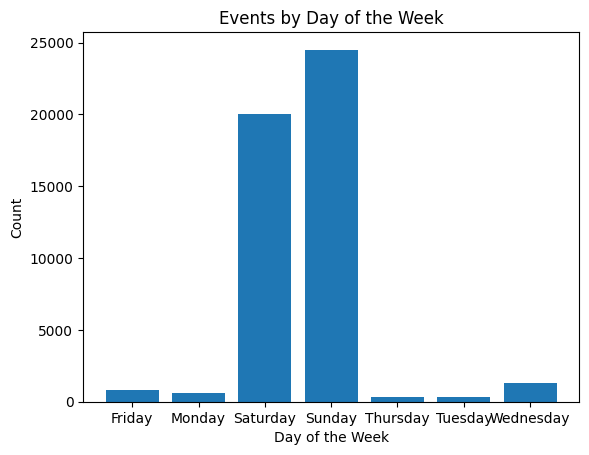

In [7]:
# Exercise 3

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['Day_of_Week'] = df['date'].dt.day_name()

day_of_week_counts = df['Day_of_Week'].value_counts().sort_index()

plt.bar(day_of_week_counts.index, day_of_week_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Events by Day of the Week')
plt.show()

In [8]:
print("ajdlfsakj")

ajdlfsakj
